# Imports

In [40]:
from qlearning_solver.qlearning import QLearning
from qlearning_solver.random_strategy import RandomStrategy
from qlearning_solver.epsilon_greedy_strategy import EpsilonGreedyStrategy

import gym
import numpy as np

# Import and configure matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 10
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.markersize'] = 15

# Definition of functions

In [41]:
def train(env, algorithm, strategy, episodes=1000, rendering=False, update_strategy=False):
    cumulated_episode_rewards = list()
    
    for episode in range(episodes):
        done = False
        
        """
        Update the strategy if the option is specified.
        If the epsilon greedy strategy is used, it decrease
        epsilon.
        """
        if update_strategy:
            strategy.update()

        cumulated_reward, reward = 0, 0 # Reset the profits
        current_state = env.reset() # Reset the environment

        """
        As long as the environment has not finished running or that
        the agent win.
        """
        while done != True:
            # Render the environment is the option is specified
            if rendering:
                env.render()

            # We choose an action
            action = algorithm.choose_action(current_state)
            
            # This action conduct the agent in a new state and give it a reward
            new_state, reward, done, _ = env.step(action)
            
            # The algorithm learned from the observation of the environment after the action of the agent
            algorithm.learn(current_state, action, new_state, reward, episode)
            
            cumulated_reward += reward # We compute the total profit using the new reward
            current_state = new_state # We update the current state
    
        if episode % (episodes / 10) == 0:
            print('Episode {} Cumulated reward: {}'.format(episode, cumulated_reward))

        cumulated_episode_rewards.append(cumulated_reward) # We update the total profit among all runned episodes

    if rendering:
        env.close()
        
    return cumulated_episode_rewards

In [42]:
def test(env, algorithm, target_reward, episodes=10, rendering=False):
    """
    Test the accuracy of algorithm without
    train the algorithm.
    """
    victories = 0

    for episode in range(episodes):
        done = False

        cumulated_reward, reward = 0, 0 # Reset the profits
        current_state = env.reset() # Reset the environment

        """
        As long as the environment has not finished running or that
        the agent win.
        """
        while done != True:
            # Render the environment is the option is specified
            if rendering:
                env.render()

            # We choose an action
            action = algorithm.choose_action(current_state)
            
            # This action conduct the agent in a new state and give it a reward
            new_state, reward, done, _ = env.step(action)
            
            cumulated_reward += reward # We compute the total profit using the new reward
            current_state = new_state # We update the current state

        print('Episode {} Cumulated reward: {}'.format(episode, cumulated_reward))

        if reward == target_reward:
            victories += 1

    if rendering:
        env.close()

    return victories / episodes # Compute the accuracy

In [43]:
def plot_cumulated_episode_rewards(cumulated_episode_rewards, title):
    plt.plot(cumulated_episode_rewards)
    plt.ylabel('Cumulative rewards')
    plt.xlabel('Episodes')
    plt.title(title)
    plt.show()

# Usage

## Make the environment

In [44]:
env = gym.make('Taxi-v2')

## Using random strategy

In [45]:
strategy = RandomStrategy()
cumulated_episode_rewards = train(
    env=env,
    algorithm=QLearning(
        actions=range(env.action_space.n),
        strategy=strategy,
        decrease_alpha=False
    ),
    strategy=strategy,
    episodes=1000,
    rendering=False,
    update_strategy=False
)

Episode 0 Cumulated reward: -713
Episode 100 Cumulated reward: -740
Episode 200 Cumulated reward: -713
Episode 300 Cumulated reward: -785
Episode 400 Cumulated reward: -848
Episode 500 Cumulated reward: -722
Episode 600 Cumulated reward: -803
Episode 700 Cumulated reward: -155
Episode 800 Cumulated reward: -776
Episode 900 Cumulated reward: -623


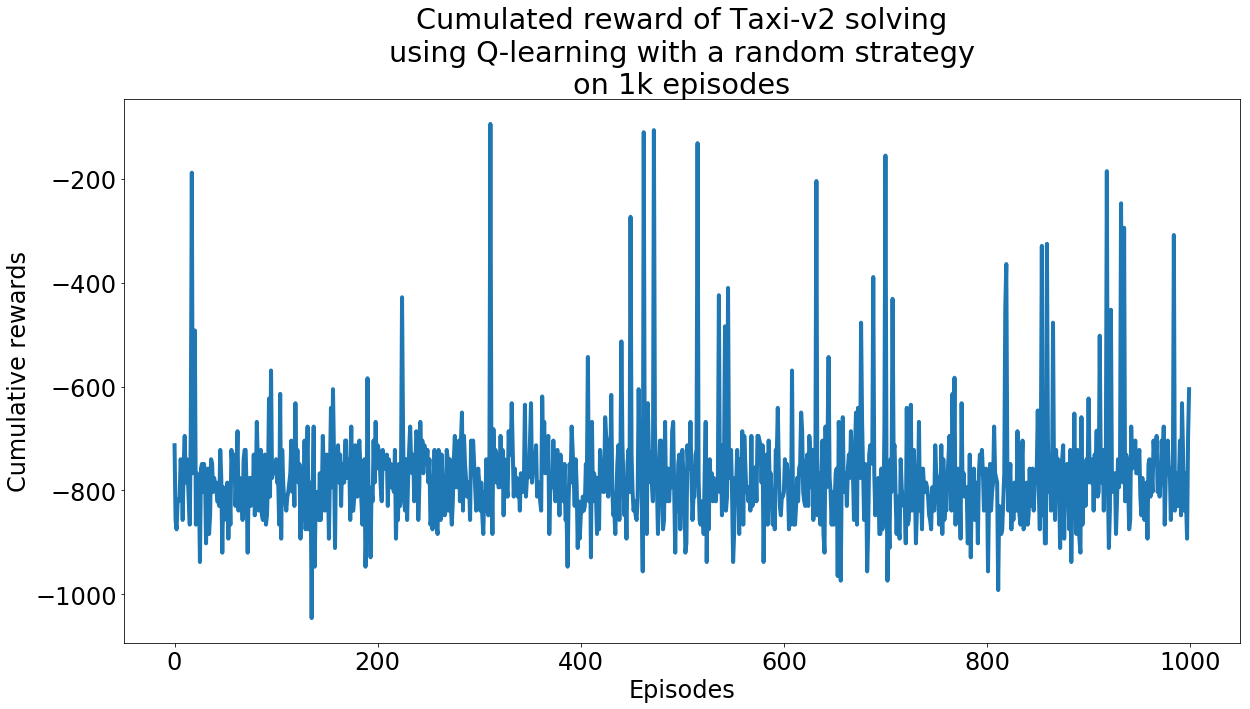

In [46]:
plot_cumulated_episode_rewards(
    cumulated_episode_rewards,
    'Cumulated reward of Taxi-v2 solving\nusing Q-learning with a random strategy\non 1k episodes'
)

In [47]:
cumulated_episode_rewards = train(
    env=env,
    algorithm=QLearning(
        actions=range(env.action_space.n),
        strategy=strategy,
        decrease_alpha=False
    ),
    strategy=strategy,
    episodes=3000,
    rendering=False,
    update_strategy=False
)

Episode 0 Cumulated reward: -830
Episode 300 Cumulated reward: -749
Episode 600 Cumulated reward: -749
Episode 900 Cumulated reward: -848
Episode 1200 Cumulated reward: -812
Episode 1500 Cumulated reward: -947
Episode 1800 Cumulated reward: -794
Episode 2100 Cumulated reward: -785
Episode 2400 Cumulated reward: -902
Episode 2700 Cumulated reward: -713


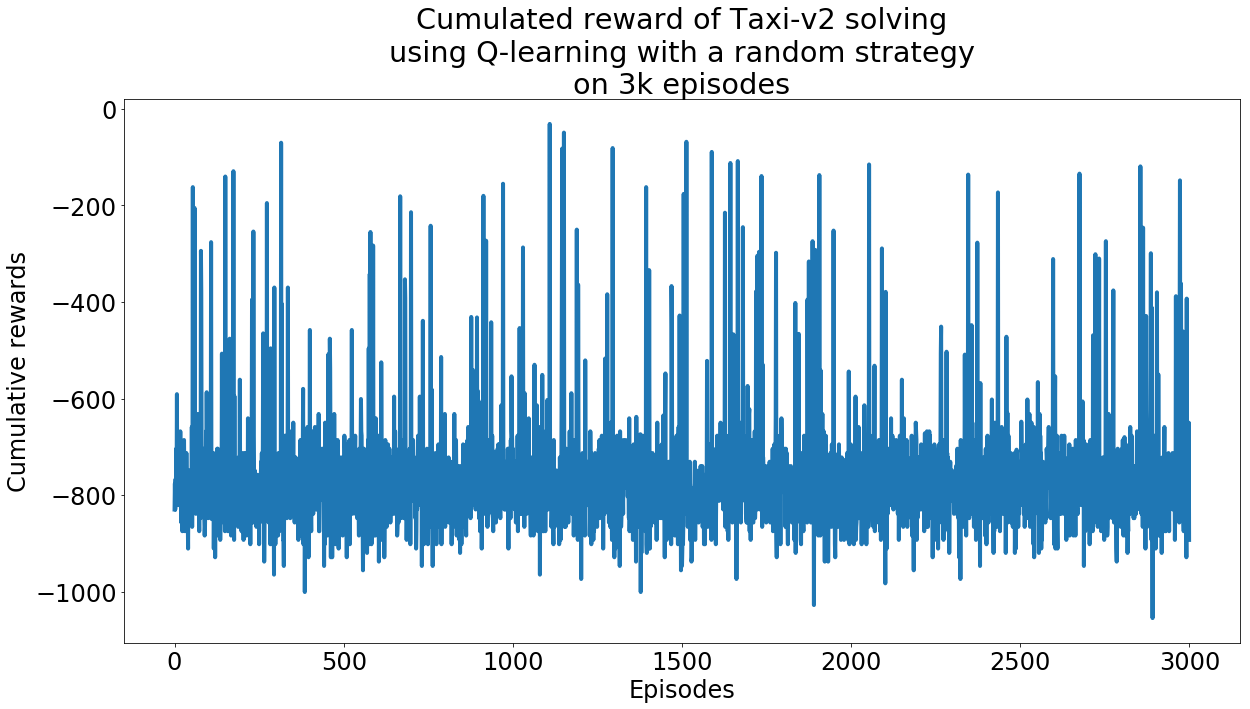

In [48]:
plot_cumulated_episode_rewards(
    cumulated_episode_rewards,
    'Cumulated reward of Taxi-v2 solving\nusing Q-learning with a random strategy\non 3k episodes'
)

## Using epsilon-greedy strategy

In [49]:
strategy = EpsilonGreedyStrategy()
cumulated_episode_rewards = train(
    env=env,
    algorithm=QLearning(
        actions=range(env.action_space.n),
        strategy=strategy,
        decrease_alpha=False
    ),
    strategy=strategy,
    episodes=1000,
    rendering=False,
    update_strategy=False
)

Episode 0 Cumulated reward: -641
Episode 100 Cumulated reward: -254
Episode 200 Cumulated reward: -263
Episode 300 Cumulated reward: -52
Episode 400 Cumulated reward: -93
Episode 500 Cumulated reward: -50
Episode 600 Cumulated reward: 1
Episode 700 Cumulated reward: 8
Episode 800 Cumulated reward: 0
Episode 900 Cumulated reward: -1


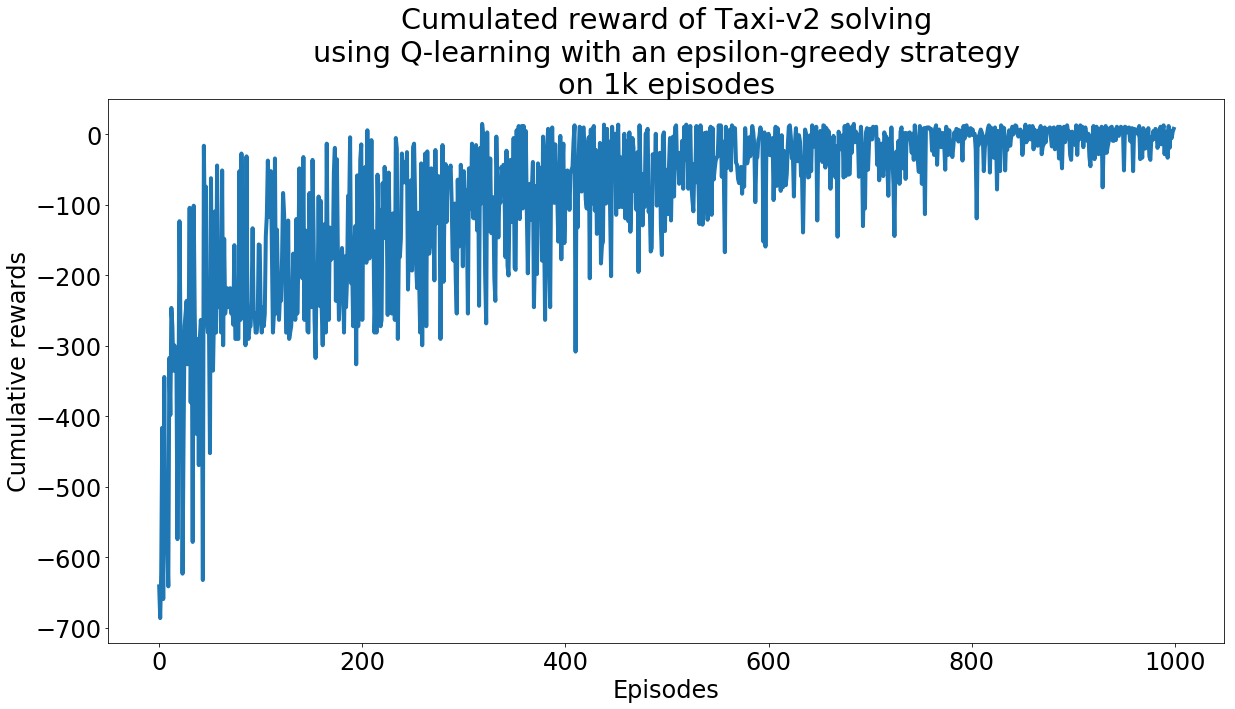

In [50]:
plot_cumulated_episode_rewards(
    cumulated_episode_rewards,
    'Cumulated reward of Taxi-v2 solving\nusing Q-learning with an epsilon-greedy strategy\non 1k episodes'
)

In [51]:
cumulated_episode_rewards = train(
    env=env,
    algorithm=QLearning(
        actions=range(env.action_space.n),
        strategy=strategy,
        decrease_alpha=False
    ),
    strategy=strategy,
    episodes=3000,
    rendering=False,
    update_strategy=False
)

Episode 0 Cumulated reward: -641
Episode 300 Cumulated reward: -69
Episode 600 Cumulated reward: 13
Episode 900 Cumulated reward: -10
Episode 1200 Cumulated reward: 6
Episode 1500 Cumulated reward: 10
Episode 1800 Cumulated reward: -2
Episode 2100 Cumulated reward: 2
Episode 2400 Cumulated reward: -9
Episode 2700 Cumulated reward: 7


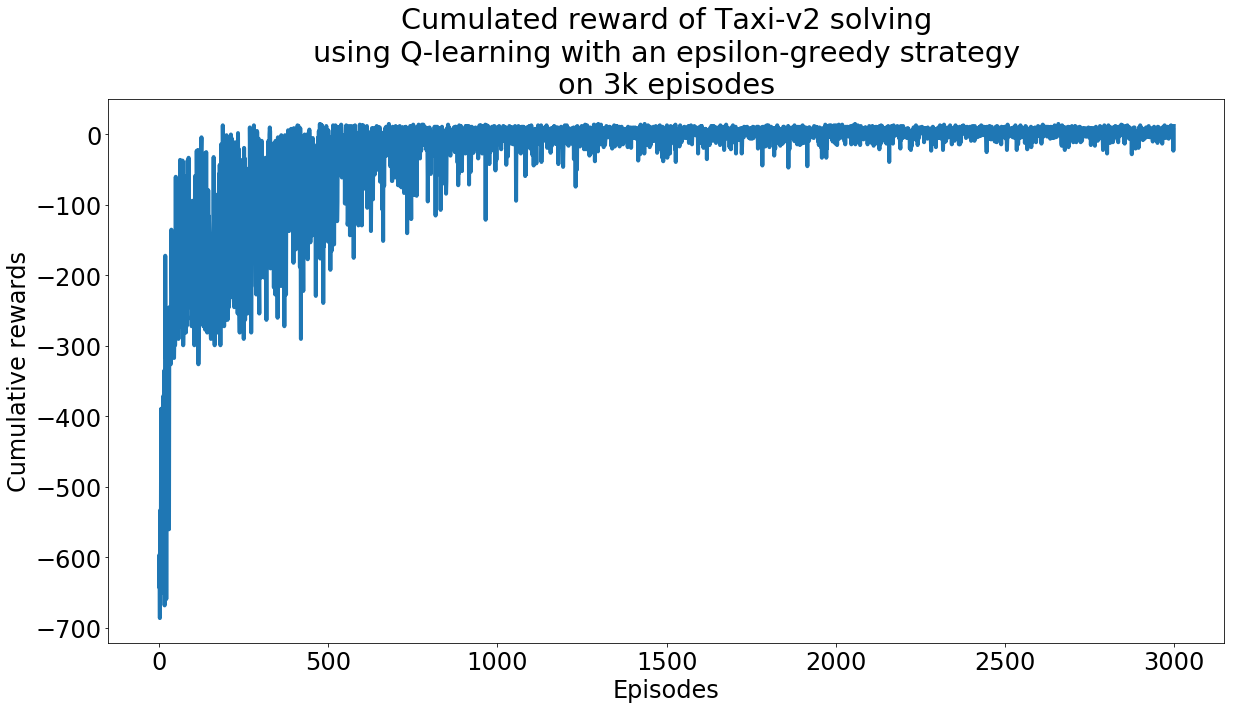

In [52]:
plot_cumulated_episode_rewards(
    cumulated_episode_rewards,
    'Cumulated reward of Taxi-v2 solving\nusing Q-learning with an epsilon-greedy strategy\non 3k episodes'
)

## Using epsilon-greedy strategy with decreasing of epsilon

In [53]:
cumulated_episode_rewards = train(
    env=env,
    algorithm=QLearning(
        actions=range(env.action_space.n),
        strategy=strategy,
        decrease_alpha=False
    ),
    strategy=strategy,
    episodes=1000,
    rendering=False,
    update_strategy=True
)

Episode 0 Cumulated reward: -627
Episode 100 Cumulated reward: -200
Episode 200 Cumulated reward: -22
Episode 300 Cumulated reward: -200
Episode 400 Cumulated reward: -46
Episode 500 Cumulated reward: -151
Episode 600 Cumulated reward: -80
Episode 700 Cumulated reward: 13
Episode 800 Cumulated reward: -50
Episode 900 Cumulated reward: 2


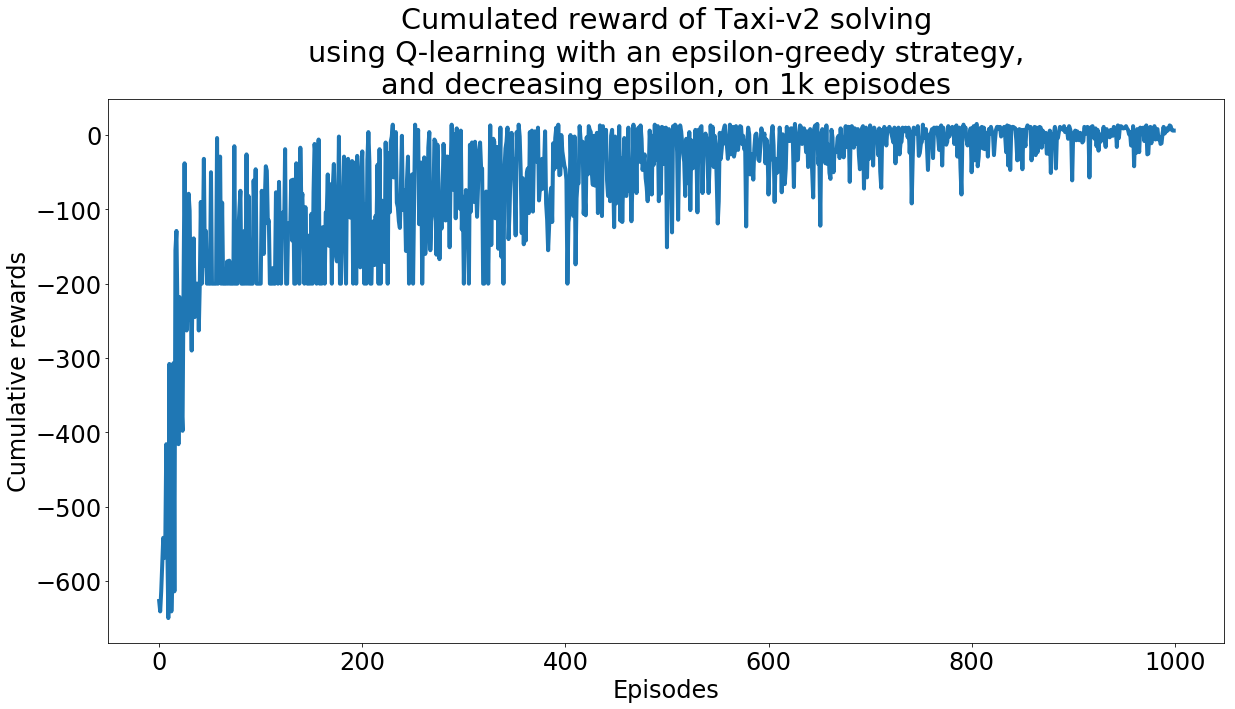

In [54]:
plot_cumulated_episode_rewards(
    cumulated_episode_rewards,
    'Cumulated reward of Taxi-v2 solving\nusing Q-learning with an epsilon-greedy strategy,\nand decreasing epsilon, on 1k episodes'
)

In [55]:
cumulated_episode_rewards = train(
    env=env,
    algorithm=QLearning(
        actions=range(env.action_space.n),
        strategy=strategy,
        decrease_alpha=False
    ),
    strategy=strategy,
    episodes=3000,
    rendering=False,
    update_strategy=True
)

Episode 0 Cumulated reward: -587
Episode 300 Cumulated reward: -31
Episode 600 Cumulated reward: 6
Episode 900 Cumulated reward: 11
Episode 1200 Cumulated reward: 11
Episode 1500 Cumulated reward: 9
Episode 1800 Cumulated reward: 8
Episode 2100 Cumulated reward: 5
Episode 2400 Cumulated reward: 8
Episode 2700 Cumulated reward: 10


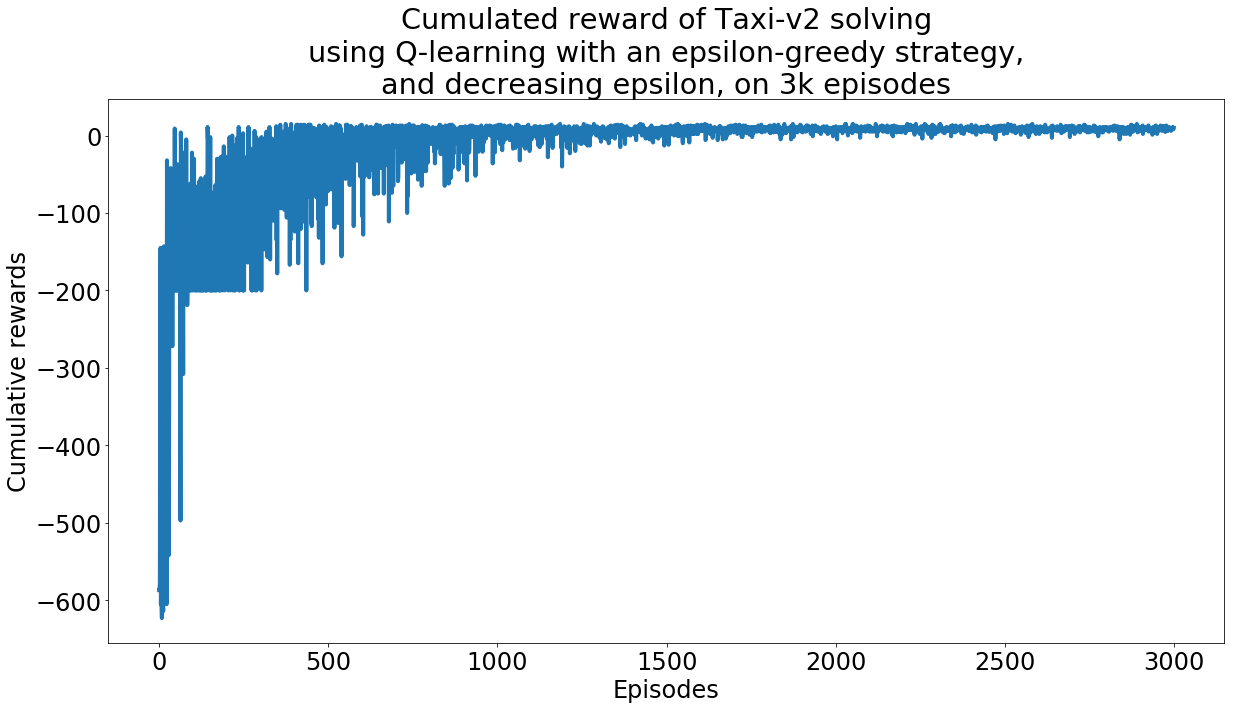

In [56]:
plot_cumulated_episode_rewards(
    cumulated_episode_rewards,
    'Cumulated reward of Taxi-v2 solving\nusing Q-learning with an epsilon-greedy strategy,\nand decreasing epsilon, on 3k episodes'
)

## Using epsilon-greedy strategy with decreasing of epsilon and alpha

In [60]:
algorithm = QLearning(
    actions=range(env.action_space.n),
    strategy=strategy,
    decrease_alpha=True
)
cumulated_episode_rewards = train(
    env=env,
    algorithm=algorithm,
    strategy=strategy,
    episodes=500,
    rendering=False,
    update_strategy=True
)

Episode 0 Cumulated reward: -596
Episode 50 Cumulated reward: -170
Episode 100 Cumulated reward: -37
Episode 150 Cumulated reward: 14
Episode 200 Cumulated reward: -38
Episode 250 Cumulated reward: 6
Episode 300 Cumulated reward: 10
Episode 350 Cumulated reward: 10
Episode 400 Cumulated reward: 6
Episode 450 Cumulated reward: 10


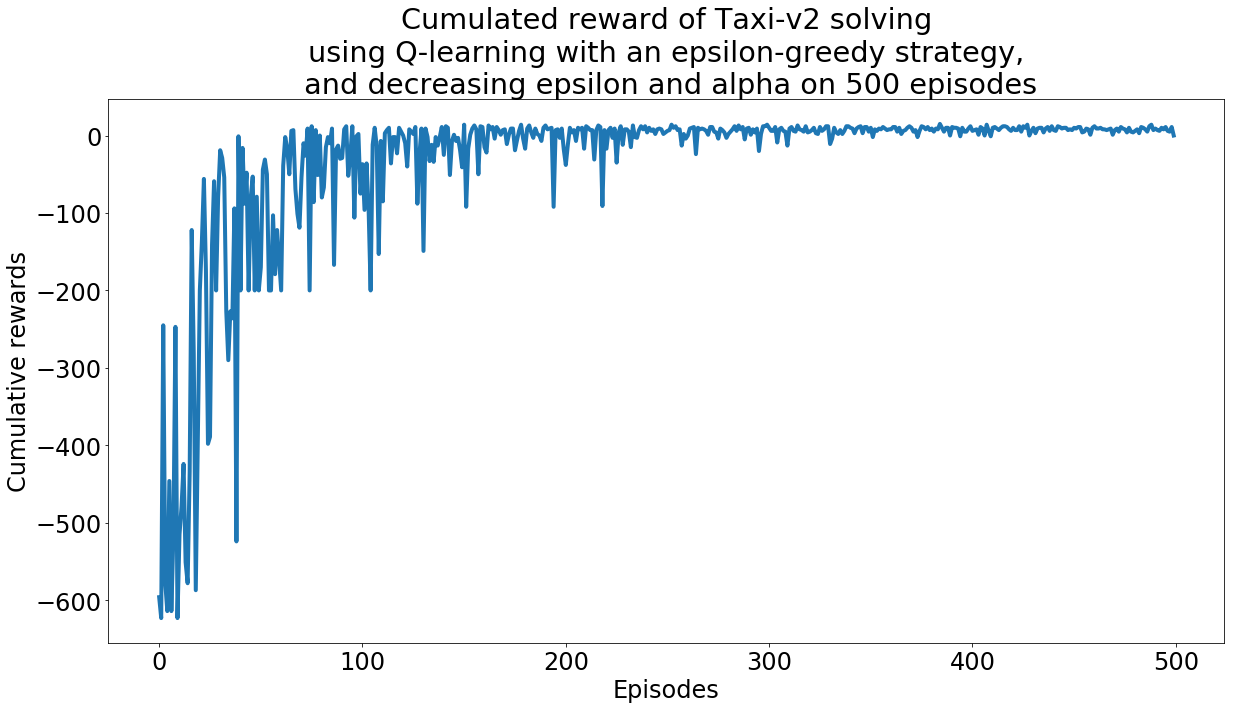

In [61]:
plot_cumulated_episode_rewards(
    cumulated_episode_rewards,
    'Cumulated reward of Taxi-v2 solving\nusing Q-learning with an epsilon-greedy strategy,\n and decreasing epsilon and alpha on 500 episodes'
)

In [64]:
accuracy = test(env, algorithm, target_reward=20.0, episodes=10, rendering=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |

In [67]:
print('Accuracy: {}'.format(accuracy))

Accuracy: 1.0
